<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_3_ML_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall flake8 pycodestyle_magic
# %load_ext pycodestyle_magic
#%pycodestyle_off

#PYTHON-11. Feature Engineering

In [ ]:
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #(action='once')
import missingno as msno
# from itertools import combinations
# from scipy.stats import ttest_ind
# from scipy.stats import norm

%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.options.display.precision = 3


#import sys
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#sys.path.clear
#sys.path.append('/content/gdrive/MyDrive/SkillFactory')

#Загрузка

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
#log = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/log.csv', names=cols)
log = pd.read_csv(log_path, names=cols)

#users = pd.read_csv(
#    '/content/gdrive/MyDrive/SkillFactory/vsers.csv',
#    encoding='koi8-r',
#    sep = '\t'
#)

users_path = 'https://raw.githubusercontent.com/akitim/datasets/main/users.csv'
users = pd.read_csv(
    users_path,
    encoding='koi8-r',
    sep = '\t'
)
users.columns = ['user_id', 'email', 'geo']
users.sample(1)
# log.sample(1)

,Юзверь,мейл,Гео
52,User_904,Kryptoburs@yahoo.com,Ярославль


Задание 1-5

In [ ]:
len(log.loc[log.loc[:, 'time'].isna(), 'time'])

15

In [ ]:
#log.dropna(axis=1)

#log.dropna(axis=0)

#log.loc[users.index.intersection(['time', 'user_id'])].dropna(axis=1)
for col in ['time', 'user_id']:
    if log.loc[:, col].isna().any():
         log.drop(col, inplace=True, axis=1)
log

,user_id,bet,win
0,Запись пользователя № - user_919,NaN,NaN
1,Запись пользователя № - user_973,NaN,NaN
2,Запись пользователя № - user_903,NaN,NaN
3,Запись пользователя № - user_954,NaN,NaN
4,Запись пользователя № - user_954,NaN,NaN
...,...,...,...
995,Запись пользователя № - user_984,9754.0,NaN
996,#error,10054.0,29265.0
997,#error,10454.0,NaN
998,#error,1000.0,NaN


In [ ]:
len(log[['time','user_id']].drop_duplicates())

986

11.3 Преобразование к datetime

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)

log = log.dropna()

time = log.loc[:, 'time']
time = pd.to_datetime(
    time.apply(lambda t: t[1:] if type(t) == str else t),

)
time.apply(lambda t: t.minute)

14     57
29     59
151    54
189    34
205    26
       ..
967    25
971    35
972    35
976    35
991    55
Name: time, Length: 133, dtype: int64

#11.4 Извлечение признаков времени

In [ ]:
#Задание 1

log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)
log.dropna(inplace=True)

log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t),
)
log.loc[:, 'time'].dt.minute.value_counts().index[0]
# pd.DataFrame(log.loc[:, 'time'].dt.minute.value_counts())
# pd.DataFrame(log.loc[:, 'time'].dt.second).hist();
# pd.DataFrame(log.loc[:, 'time'].dt.minute).hist();
# pd.DataFrame(log.loc[:, 'time'].dt.hour).hist();

# Задание 2
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)
log.dropna(inplace=True)
log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t)
)
log.loc[:, 'time'].dt.month.value_counts() #.index[0]

3    57
4    51
2    16
1     9
Name: time, dtype: int64

In [ ]:
# Задание 3*
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)
log.dropna(inplace=True)

log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t),
)

weekend = log.loc[:, 'time'].dt.weekday.apply (lambda d: d in [5, 6])
len(log.loc[weekend, 'time'])

log[(log.time.dt.weekday == 5) | (log.time.dt.weekday == 6)]['time'].count()

37

# Задание 4*

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)
# log.dropna(inplace=True)

log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t),
)

def timeofday(h):
    if h >= 0 and h <= 5:
        return 'night'
    elif h >=6 and h <= 11:
        return 'morning'
    elif h >= 12 and h <= 17:
        return 'day'
    else:
        return 'evening'

time = log.loc[:, 'time'].dropna()
drare = time.dt.hour.apply(timeofday).value_counts().min()
print(
time.dt.hour.apply(timeofday).value_counts() [
    time.dt.hour.apply(timeofday).value_counts() == drare
].index[0]
)

evening


#11.5 Снова смотрим на пропуски

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)

log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'bet'].value_counts()[0]

515

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)
log.loc[:, 'bet'].fillna(0, inplace=True)

def fillna_win(row):
    if pd.isna(row['win']) and pd.isna(row['bet']):
        row['win'] = 0
        return row
    elif row['bet'] == 0:
        row['win'] = 0
        return row
    elif pd.isna(row['win']) and not(pd.isna(row['bet'])):
        row['win'] = -row['bet']
        return row
    else:
        return row
log = log.apply(lambda row: fillna_win(row), axis=1)
(log.loc[:, 'win'] < 0).sum()

#11.6 Есть ли смысл играть?
#Задание 1
log.loc[:, 'net'] = -log.loc[:, 'bet']
log.loc[log.loc[:, 'win'] >= 0, 'net'] = log.loc[:,'win'] - log.loc[:, 'bet']
(log.loc[:, 'net'] > 0).sum()

#Задание 2
round(
    log.loc[log.loc[:, 'net'] > 0, 'net'].mean()
)   # => 80253

#Задание 3
round(
    log.loc[log.loc[:, 'net'] > 0, 'net'].median()
)   # => 5347
# log.loc[log.loc[:, 'net'] < 1e7, 'net'].hist(bins=50, log=True);
# plt.xlabel('net');
# plt.title('Net distribution');

80253.33333333333

#11.7 Сколько можно выиграть/проиграть?

In [ ]:
import pandas as pd

log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)

log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'win'].fillna(0, inplace=True)

log.loc[:, 'net'] = log.loc[:, 'win'] - log.loc[:, 'bet']

#log.loc[log.loc[:, 'bet'] > 0, 'bet'].count()

#Задание 1
round(
    (log.loc[:, 'bet'] > 0).sum() / len(log) * 100,
    #(log.loc[:, 'bet'] > 0).mean() * 100
    1
)

#Задание 2
log.loc[log.loc[:, 'bet'] > 0, 'bet'].mean() // 1

#Задание 3
log.loc[log.loc[:, 'bet'] > 0, 'net'].mean() // 1

#Задание 4
round(log.loc[log.loc[:, 'net'] < 0, 'net'].mean()) + 1

#Задание 5
#процент выигрышных ставок
winbet = ((log.loc[:, 'bet'] > 0) * (log.loc[:, 'net'] > 0)).mean() * 100
winbet < 100 - winbet

True

In [ ]:
#Задание 6*
import pandas as pd

def r2i(f):
    return round(f - 0.5)

log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)

log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'win'].fillna(0, inplace=True)

min_bet = log.loc[log.loc[:, 'bet'] > 0, 'bet'].min()
min_bet_amount = r2i(
    log.loc[log.loc[:, 'bet'] == min_bet, 'bet'].count()
)


#11.8 Повторение merge/groupby

In [ ]:
import pandas as pd

def r2i(f):
    return round(f - 0.5)

log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)

us_path = 'https://raw.githubusercontent.com/akitim/datasets/main/users.csv'
us = pd.read_csv(
    us_path,
    encoding='koi8-r',
    sep = '\t'
)
us.columns = ['user_id', 'email', 'geo']

# Приведем признак user_id к одному формату в обоих датасетах
us.user_id = us.user_id.apply(lambda x: x.lower())

# Избавимся от ошибок в user_id
log = log[log.user_id != '#error']
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])

log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'win'].fillna(0, inplace=True)

log.loc[:, 'net'] = log.loc[:, 'win'] - log.loc[:, 'bet']

logus = pd.merge(log, us, on='user_id')

logus.groupby('user_id')['win'].median().median()

#11.9 Анализ по пользователям
# Задание 1
r2i(logus.groupby(by='user_id')['net'].sum().median())

#Задание 2*
# logus.groupby(by='user_id')['bet'].sum().sort_values(ascending=True)

unix = logus.loc[logus.loc[:, 'bet'] > 0, 'user_id'].unique()

r2i(
    logus.loc[
    logus.loc[:, 'bet'] == 0,
    'user_id'
    ].apply(lambda u: u if u in unix else '').value_counts().mean()
) # => 5

#Задание 3**
# Сколько в среднем времени проходит
# между появлением человека в сервисе и первой ставкой?

logus.loc[:, 'time'] = pd.to_datetime(
    logus.loc[:, 'time'].apply(lambda t: t[1:])
)

def time2bet (id):
    tb = logus.loc[
        logus.loc[:, 'user_id'] == id, 'time':'bet'
    ].sort_values(by='time')

    t_appear = tb.loc[tb.index.min(), 'time']
    t_1stbet = tb.loc[tb.loc[tb.loc[:, 'bet'] > 0, 'time'].index.min(), 'time']

    return (t_1stbet - t_appear).total_seconds() / 3600 / 24

unix = logus.loc[logus.loc[:, 'bet'] > 0, 'user_id'].unique()

dt = pd.DataFrame(data=[time2bet(u) for u in unix], index = unix, columns=['time_to_1stbet'])
r2i(dt.loc[:, 'time_to_1stbet'].mean())
# time2bet('user_902')

47

#11.10 Анализ по городам

In [ ]:
# Задание 1
logus.groupby(by='geo')['win'].sum().sort_values(ascending=False).index[1]

# Задание 2*

mean_bet_by_city = logus.loc[
    logus.loc[:, 'bet'] != 0, :
].groupby(by='geo')['bet'].mean() #.sort_values(ascending=False)

r2i(mean_bet_by_city.max() / mean_bet_by_city.min())

127

In [ ]:
 #Задание 3
import pandas as pd

def r2i(f):
    return round(f - 0.5)

log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)

us_path = 'https://raw.githubusercontent.com/akitim/datasets/main/users.csv'
us = pd.read_csv(
    us_path,
    encoding='koi8-r',
    sep = '\t'
)
us.columns = ['user_id', 'email', 'geo']

# Приведем признак user_id к одному формату в обоих датасетах
us.user_id = us.user_id.apply(lambda x: x.lower())

# Избавимся от ошибок в user_id
log = log[log.user_id != '#error']
 log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])

logus = pd.merge(log, us, on='user_id')

sample2 = logus.groupby(by='geo')['user_id'].count()

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
Name: user_id, dtype: int64

#1.5. Скалярное произведение векторов

In [ ]:
import numpy as np

x = np.array([4,6,1])
np.dot(x,x)**0.5

7.280109889280518

#1.7. --> Практика. Векторы

In [ ]:
import numpy as np
import pandas as pd
Hut_Paradise_DF = pd.DataFrame({'1.Rent': [65, 70, 120, 35, 40, 50, 100, 90, 85],
                                '2.Area': [50, 52, 80, 33, 33, 44, 80, 65, 65],
                                '3.Rooms':[3, 2, 1, 1, 1, 2, 4, 3, 2],
                                '4.Floor':[5, 12, 10, 3, 6, 13, 8, 21, 5],
                                '5.Demo two weeks':[8, 4, 5, 10, 20, 12, 5, 1, 10],
                                '6.Liv.Area': [37, 40, 65, 20, 16, 35, 60, 50, 40]})
#Задание 1.7.1
hp = Hut_Paradise_DF
hp.loc[4,:].values

#Задание 1.7.2
# print(str(hp.loc[:, '4.Floor'].values).replace(' ', ',').replace(',,', ',')[2:-1])

hp.shape

#Задание 1.7.5
nlva = hp.loc[:, '2.Area']-hp.loc[:, '6.Liv.Area']
# print(str(nlva.values).replace(' ', ',').replace(',,', ',')[1:-1])

#Задание 1.7.6
grr = hp.loc[:, '1.Rent'] * 4 / 10
# print(','.join(grr.astype(int).astype(str).values))

# Задание 1.7.7
hp.loc[:, '7.T.demo'] = [10, 20, 30, 15, 5, 40, 20, 8, 20]

# display(hp.head(9))
# print('\n','='*66, '\n')

np.dot(hp.loc[:, '7.T.demo'],hp.loc[:, '5.Demo two weeks'])

# Задача 2. Условие
# Даны три вектора:

u = np.array([3,0,1,1,1])
v = np.array([0,1,0,2,-2])
w = np.array([1,-4,-1,0,-2])
a = {'u': u, 'v': v, 'w': w }

from itertools import combinations

for c in combinations(['u', 'v', 'w'], 2):
    print (f'Векторы {c[0]} и {c[1]} ортогональны: \
    {np.dot(a[c[0]], a[c[1]]) == 0}')

# Задание 1.7.8
# Составьте линейную комбинацию векторов v и w с коэффициентами 2 и -3:

# print(','.join(list(map(str, 2*v - 3*w))))

# Задание 1.7.10

def norm(v):
    return v / np.dot(v, v)**0.5

round (norm(u)[2], 3)
round (norm(v)[3], 3)
round (norm(w)[0], 3)


Векторы u и v ортогональны:     True
Векторы u и w ортогональны:     True
Векторы v и w ортогональны:     True


0.213

#1.10. Практика. Базовые действия над матрицами

In [ ]:
import numpy as np

def print_arr(a):
    print(','.join(list(map(str, a))))
    return None
Husband_Income = np.array([100,220,140])
Wife_Income = np.array([150,200,130])
Mother_In_Law_Income = np.array([90,80,100])

Husband_Сonsumption = np.array([50,50,60])
Wife_Сonsumption = np.array([100,80,140])
Mother_In_Law_Сonsumption = np.array([100,20,140])

inc = np.array([Husband_Income,
               Wife_Income,
               Mother_In_Law_Income]).T
cons = np.array([Husband_Сonsumption,
                Wife_Сonsumption,
                Mother_In_Law_Сonsumption]).T

# Задание 1.10.3
print(','.join(list(map(str, inc[0][:]*(1 - 0.13)))))

# Задание 1.10.4
# Вычислите матрицу P, которая покажет баланс семьи Ивановых за один месяц
# (то есть разницу между доходами (после вычета налога) и расходами)
P = inc*(1 - 0.13) - cons
print_arr(P[2, :])

87.0,130.5,78.3
61.8,-26.900000000000006,-53.0


### Задание 6.9
Составьте матрицу  из системы векторов:

$\vec{a}$$ = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \vec{b}$$ = \begin{pmatrix} 2 \\ -1 \end{pmatrix}, \vec{c}$$ = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$

Найдите матрицу Грама $G = A^T * A$

In [ ]:
import numpy as np

a = np.array([1, 1])
b = np.array([2, -1])
c = np.array([1, 2])

A = np.stack([a, b, c]).T
G = A.T @ A
print(G)



[[2 1 3]
 [1 5 0]
 [3 0 5]]


def print_arr(a):
    print(','.join(list(map(str, a))))
    return None

In [ ]:
def print_arr(a):
    print(','.join(list(map(str, a))))
    return None

A = np.array([[5,-1,3,1,2], [-2,8,5,-1,1]])
x = np.array([1,2,3,4,5])

print_arr(A @ x)

26,30


#1.15. --> Практика. Умножение матриц

In [ ]:
import numpy as np

def print_arr(a):
    print(','.join(list(map(lambda f: str(round(f, 3)), a))))
    return None

A = np.array([[5,-1,3,1,2],
              [-2,8,5,-1,1]])
x = np.array([1,2,3,4,5])

# Задание 1.15.1
# print_arr(np.dot(A, x))

# Задание 1.15.2
# Найдите произведение матриц  и  в том порядке, в котором их можно умножить.
A = np.array( [ [1,9,8,5], [3,6,3,2], [3,3,3,3], [0,2,5,9], [4,4,1,2] ] )
B = np.array( [ [1,-1,0,1,1] , [-2,0,2,-1,1] ] )

print(np.dot(B, A)[0][3])

# Задача 3. Условие
x = np.array([1,2,1,0,4])
y = np.array([2,1,-1,1,0])
z = np.array([-1,1,-1,0,0])
# Составьте матрицу A, расположив векторы x, y, z в строках.
# Найдите матрицу Грама G (матрицу скалярных произведений столбцов матрицы A)
# системы векторов x, y, z.
# Чему равна полученная матрица Грама ?

# Задание 1.15.3
G = np.dot(np.array([x, y, z]).T, np.array([x, y, z]))
# print_arr(G.flatten())
print(G)

# Задача 4. Условие
import pandas as pd
serv = pd.DataFrame({'Женские стрижки': [10, 2, 12, 4, 6, 10, 22, 7],
                                'Мужские стрижки': [5, 21, 12, 8, 25, 3, 1, 0],
                                'Окрашивания':[12, 3, 0, 18, 27, 2, 4, 31],
                              'Укладка':[15, 25, 30, 14, 25, 17, 25, 31],
                                'Уход':[10, 6, 4, 5, 18, 12, 20, 28]
                                },
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
price = pd.DataFrame({'Женские стрижки': [2, 1.8, 2, 1.8, 2.5, 5, 1.1, 4.5],
                                'Мужские стрижки': [1.5, 2.5, 2, 1.2, 3.5, 5, 1, 4],
                                'Окрашивания':[1, 1, 0, 2.8, 2, 3, 1.5, 2.5],
                              'Укладка':[0.8, 1, 0.5, 0.8, 1, 2, 0.5, 1],
                                'Уход':[1, 1, 2, 2, 1.5, 2.5, 1.7, 2]
                                },
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])

# Задание 1.15.4
# Найдите вектор выручки Бориса.
display(serv.head(1))
# display(price.head(1))
print('\n', '='*50, '\n')

# print_arr(np.array(serv.loc['Борис', :]*price.loc['Борис',:]))

# Задание 1.15.5
com = [0.2, 0.2, 0.3, 0.1, 0.1] #Вектор комиссий
print_arr(np.dot(serv*price, com))

# Задание 1.15.6
rev = np.ones((8, 1)) - com
# print_arr(np.dot(serv*price, rev))
print_arr((serv*price*rev).sum(axis=1).values) #вариант1

rev = np.ones((1, 5)) - com
print_arr(np.dot(serv*price, rev.T).T.flatten())  #вариант2

14
[[ 6  3  0  2  4]
 [ 3  6  0  1  8]
 [ 0  0  3 -1  4]
 [ 2  1 -1  1  0]
 [ 4  8  4  0 16]]


,Женские стрижки,Мужские стрижки,Окрашивания,Укладка,Уход
Аня,10,5,12,15,10




11.3,15.22,11.9,20.6,41.9,21.2,11.49,38.25
50.2,74.88,59.1,67.8,166.6,113.8,66.21,157.75
50.2,74.88,59.1,67.8,166.6,113.8,66.21,157.75


#1.19. Линейная (не)зависимость ч.2

In [ ]:
import numpy as np
import numpy.linalg as npla

A = np.array([[1, 0, 3, 5],
              [1, 0, 4, 5],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])
npla.matrix_rank(A)

# 1.20. Практика. Обратная матрица, ранг, определитель
A = np.array([[8, 6, 11], [ 7, 5, 9], [ 6 , 10,  6]])

# Задание 1.20.1
print(f'Задание 1.20.1: {round(npla.inv(A)[1][0], 3)}\n')

v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])

# Задание 1.20.2
V = np.array([v1, v2, v3, v4])
print('Ранг системы векторов v1, v2, v3, v4:', npla.matrix_rank(V.T))
print('Векторы v1, v2, v3, v4 линейно независимы:', npla.matrix_rank(V.T) == V.T.shape[1], '\n')

# Задание 1.20.4
G = V@V.T
print(f'Задание 1.20.4: {G[0][3]}\n')

# Задание 1.20.5
round(npla.det(G))

# Задание 10.7

# Найдите обратную матрицу к матрице Грама системы векторов v1, v2, v3, v4.
# В качестве ответа запишите элемент из первого столбца третьей строки, округлив
# его до трёх знаков после точки-разделителя.

print(f'Задание 10.7 {round(npla.inv(G)[2, 0], 3)}')

Задание 1.20.1: 0.375

Ранг системы векторов v1, v2, v3, v4: 4
Векторы v1, v2, v3, v4 линейно независимы: True 

Задание 1.20.4: -35

Задание 10.7 -0.026


### Задание 1.7

Найдите ранг матрицы системы, составленной из векторов $\vec{v_1}=(2,10,-2)^T, \vec{v_2}=(3,2,-2)^T, \vec{v_3}=(8,14,-6)^T$:

In [ ]:
import numpy as np

v1 = np.array([2, 10, -2])
v2 = np.array([3, 2, -2])
v3 = np.array([8, 14, -6])

A = np.array([v1, v2, v3]).T
np.linalg.matrix_rank(A)

2

#2.6. Случай «Всё сложно» ч.2

In [ ]:
import numpy as np
import numpy.linalg as npla

def print_arr(*args, a):
    print(*args, ','.join(list(map(lambda f: str(round(f, 2)), a))), '\n')
    return None

# Задание 2.6.1
# Вычислите вектор ошибок для приближённого решения системы w
w = np.array([1, 1])
A = np.array([[1, -5],
             [2, 1],
             [1, 1]])
b = np.array([1,2,2])
print_arr('Задание 2.6.1:', a=b - A@w)

#Задание 2.6.3
# Найдите OLS оценку для коэффициентов w1, w2 СЛАУ
A = np.array([[1, 2],
              [-3, 1],
              [1, 2],
              [1,-1]])
b = np.array([1, 4, 5, 0])

# Задание 2.6.3_1
print ('Задание 2.6.3_1:', A.T@A, '\n')

# Задание 2.6.3_3
print_arr('Задание 2.6.3_3:', a=A.T@b)

# Задание 2.6.3_4
w_cap = npla.inv(A.T@A)@A.T@b
print_arr('Задание 2.6.3_4:', a=w_cap)

w = np.array([-29.3, -0.26, 8.4])
x = np.array([1, 0.2, 6])
w@x

# Задание 2.8.2
X = np.array([[1, -1, 0],
              [1, 1, 2],
              [0, 0, 0],
              [2, 0, 2]])
npla.det(X.T@X)

# 2.9. Стандартизация признаков
# Задание 2.9.2
x = np.array([11, 8])
xc = x - x.mean()
print_arr(a=(xc) / (xc@xc)**0.5)

Задание 2.6.1: 5,-1,0 

Задание 2.6.3_1: [[12  0]
 [ 0 10]] 

Задание 2.6.3_3: -6,16 

Задание 2.6.3_4: -0.5,1.6 

0.71,-0.71 



#2.11. --> Практика. Классический OLS алгоритм

In [ ]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import numpy.linalg as npla
import pandas as pd # для работы DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

def print_arr(a):
    print(','.join(list(map(lambda f: str(round(f, 3)), a))))
    return None

adm = pd.read_csv('https://raw.githubusercontent.com/akitim/datasets/main/Admission_Predict_Ver1.1.csv')
display(adm.head(1))
adm.columns = ['N', 'GRE', 'TOEFL', 'Uni Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'CoA']
# Задание 2.11.3
adm.corr().loc[:, 'CoA'].sort_values(ascending=False).index[1]

# Задание 2.11.4
# Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0).
# В каком случае признаки сильнее скоррелированы между собой?
adm.loc[adm.loc[:, 'Research'] == 1, :].corr().apply(lambda x: abs(x)).sum().sum(), \
adm.loc[adm.loc[:, 'Research'] == 0, :].corr().apply(lambda x: abs(x)).sum().sum()

# Задание 2.11.5
# sns.heatmap(adm.loc[adm.loc[:, 'Research'] == 0, :].corr(), cmap='hot');
adm.loc[adm.loc[:, 'Research'] == 0, :].corr()

# Задание 2.11.6
A = adm.loc[adm.loc[:, 'Research'] == 0, :].loc[:, ['TOEFL', 'CGPA']]
A.insert(0, '1', np.ones((A.shape[0],1)))
y = adm.loc[adm.loc[:, 'Research'] == 0, :].loc[:, 'CoA']
# print_arr(np.array(npla.inv(A.T@A)@A.T@y))

# Задание 2.11.7
m = np.array([-1.045, 0.004, 0.148])
x = np.array([1, 107, 9.1])
m@x

# Задание 2.11.8
# display(A)
Ast = pd.DataFrame()

TOEFL_c = A.loc[:, 'TOEFL'] - A.mean()['TOEFL']
Ast.loc[:, 'TOEFL_st'] = TOEFL_c / (TOEFL_c @ TOEFL_c)**0.5

CGPA_c = A.loc[:, 'CGPA'] - A.mean()['CGPA']
Ast.loc[:, 'CGPA_st'] = CGPA_c / (CGPA_c @ CGPA_c)**0.5

# A.drop('1', axis=1, inplace=True)
# display(Ast)

yst = (y - y.mean()) / ((y - y.mean()) @ (y - y.mean()))**0.5

print_arr(np.array(npla.inv(Ast.T@Ast)@Ast.T@y))

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


0.315,1.027


In [ ]:
import numpy as np
import numpy.linalg as npla
import pandas as pd

path = 'https://raw.githubusercontent.com/akitim/datasets/main/data_flats.csv'
data = pd.read_csv(path, sep=";")

data.head()
# data.info()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


### Задание 3.5

Сделайте прогноз типичной стоимости (в тыс. долларов) дома в городе с уровнем преступности *CRIM=0.2* и средним количеством комнат в доме *RM=6*. В качестве модели используйте линейную регрессию, оценка вектора коэффициентов которой равна: $\vec{w}=(-29.3, -0.26, 8.4)$
Ответ **округлите до целого числа**.

In [ ]:
import numpy as np
import numpy.linalg as npla

w = np.array([-29.3, -0.26, 8.4])
x_pred = np.array([1, 0.2, 6])

y_pred = w@x_pred
round(y_pred)


21

### Задание 4.3

Стандартизируйте вектор $\vec{x}=(12,8)^T$, приведя его к единичной длине. В качестве ответа введите координаты полученного вектора. Ответ округлите до третьего знака после точки-разделителя.

In [ ]:
import numpy as np
import numpy.linalg as npla

def centr_normalize(v):
    v_cent = v - np.mean(v)
    norm = (np.power(v_cent.T@v_cent, 0.5))[0, 0]
    return v_cent / norm

x = np.array([[12, 8]]).T
print(np.round(centr_normalize(x), 3))

[[ 0.707]
 [-0.707]]


### Задание 4.7

Вычислите коэффициент корреляции между векторами $\vec{v}=(5,1,2)^T$ и $\vec{u}=(4,2,8)^T$.

Ответ **округлите до двух знаков после точки-разделителя**.

In [ ]:
import numpy as np
import numpy.linalg as npla

def centr_normalize(v):
    '''Centralizes and normalizes a vector'''
    v_cent = v - np.mean(v)
    norm = (np.power(v_cent.T@v_cent, 0.5))[0, 0]
    return v_cent / norm

v = np.array([[5,1,2]]).T
u = np.array([[4,2,8]]).T

v_cn, u_cn = centr_normalize(v), centr_normalize(u)
A = np.hstack([v_cn, u_cn])

print(round((A.T@A)[0, 1], 2))

0.052


### Задание 4.8

Составьте корреляционную матрицу для системы векторов:

$\vec{x}_1=(5.1, 1.8, 2.1, 10.3, 12.1, 12.6)^T$,
$\vec{x}_2=(10.2, 3.7, 4.1, 20.5, 24.2, 24.1)^T$,
$\vec{x}_3=(2.5, 0.9, 1.1, 5.1, 6.1, 6.3)^T$

Для расчёта используйте библиотеку NumPy или Pandas.

1. Чему равен ранг полученной корреляционной матрицы?
2. Чему равен определитель полученной корреляционной матрицы? Ответ **округлите до седьмого знака после точки-разделителя**.
3. Что можно сказать об обусловленности корреляционной матрицы?

In [ ]:
import numpy as np
import numpy.linalg as npla
import pandas as pd

def centr_normalize(A):
    '''Centralizes and normalizes vector-columns of a matrix'''
    A_cent = A - np.mean(A, axis=0)
    norm_vec = np.power(np.sum(np.power(A_cent, 2), axis=0), 0.5)
    return A_cent / norm_vec

x = np.array([
    [5.1, 1.8, 2.1, 10.3, 12.1, 12.6],
    [10.2, 3.7, 4.1, 20.5, 24.2, 24.1],
    [2.5, 0.9, 1.1, 5.1, 6.1, 6.3]
]).T

x_cn = centr_normalize(x)
corr_matrix = x_cn.T@x_cn

print(f'1.Ранг корреляционной матрицы: {npla.matrix_rank(corr_matrix, tol=7e-4)}')
print(f'2.Определитель корреляционной матрицы: {round(npla.det(corr_matrix), 7)}')

corr_matrix_np = np.corrcoef(x, rowvar=False) #using numpy built-in function
corr_matrix_pd = pd.DataFrame(x).corr() #using pandas built-in function


1.Ранг корреляционной матрицы: 2
2.Определитель корреляционной матрицы: 5e-07


In [ ]:
x = np.array([
    [5.1, 1.8, 2.1, 10.3, 12.1, 12.6],
    [10.2, 3.7, 4.1, 20.5, 24.2, 24.1],
    [0.5, 0.9, 1.1, 5.1, 6.1, 6.3]
]).T

x - np.mean(x, axis=0)

a = np.array([i for i in range(12)]).reshape(4, 3)
v = [1, 2, 4]

a, a/v


(array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]),
 array([[0.  , 0.5 , 0.5 ],
        [3.  , 2.  , 1.25],
        [6.  , 3.5 , 2.  ],
        [9.  , 5.  , 2.75]]))

#2.6. Практика

In [ ]:
import numpy as np
import numpy.linalg as npla
import pandas as pd

# import sys
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# sys.path.clear
# sys.path.append('/content/gdrive/MyDrive/SkillFactory')

# Задание 2.6.6
path = '/content/gdrive/MyDrive/SkillFactory/train.csv'
vis_data = pd.read_csv(path, encoding = 'ISO-8859-1', low_memory = False)
# most_freq_state = vis_data.loc[:, 'state'].value_counts(ascending=False).index[0]
# result = vis_data.loc[:, 'state'].fillna(most_freq_state)


# Задание 2.6.7
path_data_flats = 'https://raw.githubusercontent.com/akitim/datasets/main/data_flats.csv'
# df = pd.read_csv(path_data_flats, sep=';', low_memory = False)
# df.loc[df.loc[:, 'sub_area'].apply(lambda s: s == 'Birjulevo Vostochnoe'), 'ecology'].value_counts()
df.dropna(axis=0, inplace=True)
df.shape[0]

# Задание 2.8.3
# list(vis_data.columns)
from sklearn.preprocessing import StandardScaler

test_data = vis_data.loc[:, ['balance_due']]

scaler = StandardScaler()
round(scaler.fit_transform(test_data).min(), 5)

# # vis_data
# test_data_st = scaler.fit_transform(test_data)

-13.14733

#2.10. Практика

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# import sys
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# sys.path.clear
# sys.path.append('/content/gdrive/MyDrive/SkillFactory')

# path = '/content/gdrive/MyDrive/SkillFactory/train.csv'
# vis_data = pd.read_csv(path, encoding = 'ISO-8859-1', low_memory = False)

corr = vis_data.drop(['violation_zip_code', 'payment_amount',
                      'clean_up_cost',
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_precision(2)\
#     .set_table_styles(magnify())

#Задание 2.10.3
# bal = np.sqrt(vis_data.loc[vis_data.loc[:, 'balance_due'] > 0, ['balance_due']])
# abs(bal.mean() - bal.median())[0]

# Задание 2.10.4
# path_data_flats = 'https://raw.githubusercontent.com/akitim/datasets/main/data_flats.csv'
# df = pd.read_csv(path_data_flats, sep=';', low_memory = False)

focus = ['Basmannoe', 'Lefortovo', 'Perovo', 'Bogorodskoe']

# sns.boxplot(
#     x=df.loc[
#         df.loc[:, 'sub_area'].apply(lambda s: s in focus),
#         'sub_area'
#     ],
#     y=df.loc[
#         df.loc[:, 'sub_area'].apply(lambda s: s in focus),
#         'price_doc'
#     ]
# );
# df.loc[df.loc[:, 'sub_area'].apply(lambda s: s == 'Izmajlovo'), 'price_doc'].median()

# pd.get_dummies(df.loc[:, 'sub_area'], columns=['sub_area']).shape

# Задание 2.12.6
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
# poly_feat = poly.fit_transform(vis_data.loc[:, ['balance_due', 'payment_amount']])
# mean_list = [poly_feat[:][i].mean() for i in range(0, poly_feat.shape[1])]
# mean_list.index(np.max(mean_list)) #вариант 1

# np.array([poly_feat[:][i].mean() for i in range(0, poly_feat.shape[1])]).argmax() #вариант 2

# Задание 2.12.7
# dt_vals = pd.to_datetime(vis_data.loc[:, 'ticket_issued_date'].dropna()).dt.weekday
# dt_vals[dt_vals.apply(lambda d: d in [5, 6])].shape[0]

# Задание 2.12.8
ecology_dict = {'good': 3, 'excellent': 4, 'poor': 1, 'satisfactory': 2, 'no data': 0}
# df.loc[:, 'ecology'] = df.loc[:, 'ecology'].replace(to_replace=ecology_dict)

# # df.sample()
# pd.get_dummies(df).shape[1]
# round(df.loc[:, 'ecology'].mean(), 2)

# Задание 2.14.5
# vis_data.sample()
balance = vis_data.loc[:, 'balance_due'].dropna()
QR1 = np.percentile(balance, 25)
QR3 = np.percentile(balance, 75)

IQR = QR3 - QR1

l_bound = QR1 - 1.5 *IQR
u_bound = QR3 + 1.5 *IQR

balance[balance.between(l_bound, u_bound)].max()\
    - balance[balance.between(l_bound, u_bound)].min()

# ===========================================================
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))[0]

# balance.drop(index=outliers_iqr(balance),inplace=True)
# balance.max() - balance.min()
# ===========================================================
# from scipy.stats import norm
# import matplotlib.pyplot as plt

# def estimate_gaussian(dataset):
#     mu = np.mean(dataset, axis=0)
#     sigma = np.cov(dataset.T)
#     return mu, sigma

# def get_gaussian(mu, sigma):
#     distribution = norm(mu, sigma)
#     return distribution

# def get_probs(distribution, dataset):
#     return distribution.pdf(dataset)

# distr = get_gaussian(estimate_gaussian(balance)[0], estimate_gaussian(balance)[1])
# plt.hist(get_probs(distr, balance), log=True, bins=50, density=True);
# plt.show();

# plt.hist(balance, log=True, bins=50, density=True);
# plt.show();
# ===========================================================


1201.3

## 6/11 6. Полиномиальная регрессия (новый)

### Задание 6.1

Построена модель полиномиальной регрессии следующего вида:
$y=10.4+8 \cdot x_1+0.5 \cdot x_2+3 \cdot x_{1}^{2}+0.4 \cdot x_{2}^{2}+0 \cdot x_1 x_2$
Поступило новое наблюдение, которое характеризуется вектором $x_{new}=(x_{1new}, x_{2new})^T=(1, 4)^T$.

Сделайте прогноз целевой переменной с помощью полученной полиномиальной регрессии. Ответ **округлите до первого знака после точки-разделителя.**

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

w = np.array([10.4, 8, 0.5, 3, 0, 0.4])
x_new = np.array([[1, 4]])

pf = PolynomialFeatures(degree=2)
x_new_transformed = pf.fit_transform(x_new)

y_pred = (x_new_transformed @ w)[0]
print(np.round(y_pred, 1))
# pf.get_feature_names_out()
x_new_transformed

29.8


array([[ 1.,  1.,  4.,  1.,  4., 16.]])

### Задание 6.2

Строится полиномиальная регрессия второй степени от одного фактора $x$. Как будет выглядеть матрица наблюдений $A$, если: $\vec{x}=\left(\begin{array}{c}
1 \\
3 \\
-2 \\
9
\end{array}\right)$

В качестве ответа введите элементы полученной матрицы $A$.

Заполняйте поля **слева направо, сверху вниз.**

In [ ]:
x = [1 ,3, -2, 9]

### Задание 6.3

Какую размерность будет иметь матрица измерений $A$, если в наборе данных пять факторов, а в качестве модели используется полином второй степени?

In [ ]:
from numpy import math

def f_(n):
    return math.factorial(n)

k = 5
d = 2
n = k + d

f_(n) / f_(k) / f_(d)

21.0

### Задание 6.4

С помощью классического МНК найдите коэффициенты полиномиальной регрессии, если используется полином второй степени и задан фактор $\vec{x}$ и целевая переменная $\vec{y}$. \\
$\vec{y} = w_0 + w_1 \vec{x} + w_2 \vec{x}^2$ \\
 \\
$\vec{x}=\left(\begin{array}{c}
1 \\
3 \\
-2 \\
9
\end{array}\right) \vec{y}=\left(\begin{array}{c}
3 \\
7 \\
-5 \\
21
\end{array}\right)$


В качестве ответа приведите координаты вектора коэффициентов $\hat{w}_0$, $\hat{w}_1$, $\hat{w}_2$, **округлив их до первого знака после точки-разделителя**.

In [ ]:
x = np.array([[1, 3, -2, 9]]).T
y = np.array([3, 7, -5, 21])

A = np.hstack([np.ones((4, 1)), x, x**2])
w_hat = np.linalg.inv(A.T @ A) @ A.T @ y
print(np.round(w_hat, 1))

[ 0.1  2.5 -0. ]


## 7/11  7. Регуляризация (новый)

### Задание 7.4

Вычислите коэффициенты линейной регрессии с $L_2$-регуляризацией, используя аналитическую формулу Тихонова, если: $\vec{x}_1=\left(\begin{array}{l}
5 \\
9 \\
4 \\
3 \\
5
\end{array}\right), \vec{x}_2=\left(\begin{array}{l}
15 \\
18 \\
18 \\
19 \\
19
\end{array}\right), \vec{x}_3=\left(\begin{array}{l}
7 \\
6 \\
7 \\
7 \\
7
\end{array}\right) \text { и } \vec{y}=\left(\begin{array}{l}
24 \\
22 \\
35 \\
33 \\
36
\end{array}\right)$

Коэффициент регуляризации $\alpha=1$.

В качестве ответа приведите значения полученных коэффициентов линейной регрессии, **округлив их до второго знака после точки-разделителя**.

In [ ]:
import numpy as np

x1 = np.array([[5, 9, 4, 3, 5]]).T
x2 = np.array([[15, 18, 18, 19, 19]]).T
x3 = np.array([[7, 6, 7, 7, 7]]).T
y = np.array([24, 22, 35, 33, 36])
alpha = 1

A = np.hstack([np.ones((5, 1)), x1, x2, x3])

# Формула Тихонова с L2-регуляризацией
w_ridge = np.linalg.inv(A.T @ A - alpha * np.eye(A.shape[1])) @ A.T @ y
print('Коэффициенты регрессии:\n', *np.round(w_ridge, 2))

Коэффициенты регрессии:
 0.16 -1.95 2.12 0.34


# *BONUS. MATH&ML-3. Линейная алгебра в контексте линейных методов. Часть III (новый)

##4/9  ✏️ 4. Практика: собственные векторы и числа

### Задание 4.1

Найдите собственные числа для матрицы:
$𝒜 =\begin{pmatrix} 1 &  3 & 5 \\
4 & -4 & 9 \\ 13 & 7 & 12 \end{pmatrix}$

In [9]:
import numpy as np

A = np.array(
    [[1, 3,  5],
     [4, -4,  9],
     [13, 7, 12]]
)
eigen_val = np.linalg.eig(A)[0]
print(*np.round(eigen_val))

20.0 -4.0 -7.0


### Задание 4.2

Найдите собственные числа матрицы Грама $A^{T}A$, если:
$A =\begin{pmatrix} 1 &  9 & 4 \\
9 & 4 & 7 \\ 4 & 7 & 12 \end{pmatrix}$


Каждое из собственных чисел округлите до целого.

In [12]:
import numpy as np

A = np.array(
    [[1, 9,  4],
     [9, 4,  7],
     [4, 7, 12]]
)

eigen_val = np.linalg.eig(A.T @ A)[0]
print(*np.round(eigen_val))

391.0 46.0 16.0


##6/9  6. Метод главных компонент

---



### Задание 6.4

Допустим, мы хотим построить линейную регрессию по двум факторам: x1 и x2. Их матрица корреляций $C =\begin{pmatrix} 1 &  0.8 \\
0.8 & 1 \end{pmatrix}$

Какой признак рекомендует нам выбрать метод главных компонент?

In [17]:
import numpy as np

C = np.array(
    [[1, 0.8],
     [0.8, 1]]
)

eigen_val, eigen_vec = np.linalg.eig(C)
# eigen_val, eigen_vec


(array([1.8, 0.2]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

### Задание 6.5
Условие:

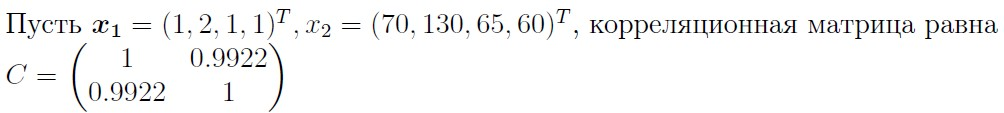

Выполните к этому условию задания ниже:

#### Задание 6.5-3
4) Выберите одну главную компоненту для дальнейшего анализа. Вычислите её значения.

Введите компоненты с округлением до второго знака после запятой.

In [53]:
import numpy as np

x1 = np.array([[1, 2, 1, 1]]).T
x2 = np.array([[70, 130, 65, 60]]).T
C = np.array(
    [[1, 0.9922],
     [0.9922, 1]]
)

X = np.hstack([x1, x2])
X_st = (X - np.mean(X, axis=0)) /\
np.power(np.diagonal((X - np.mean(X, axis=0)).T @ (X - np.mean(X, axis=0))), 0.5)
# альтернативный способ подсчета
# X_st = (X - np.mean(X, axis=0)) /\
#  np.array([r[i]**0.5 for i, r in
#            enumerate((X - np.mean(X, axis=0)).T @ (X - np.mean(X, axis=0)))])
print('Собственные значения и векторы С:\n',
      np.linalg.eig(C)[0],'\n', np.linalg.eig(C)[1])

NF = X_st @ np.linalg.eig(C)[1][:, 0]
NF_st = NF / np.power((NF @ NF), 0.5)
print('\nНовый признак по методу PCA:\n', *np.round(NF_st, 2))



Собственные значения и векторы С:
 [1.9922 0.0078] 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Новый признак по методу PCA:
 -0.24 0.86 -0.29 -0.33


In [40]:
(X - np.mean(X, axis=0)) /\
np.power(np.diagonal((X - np.mean(X, axis=0)).T @ (X - np.mean(X, axis=0))), 0.5)


array([[-0.28867513, -0.19829369],
       [ 0.8660254 ,  0.85927267],
       [-0.28867513, -0.28642422],
       [-0.28867513, -0.37455475]])

#PYTHON-12. Работа с файлами разных форматов

In [ ]:
import json
from pprint import pprint
import pandas as pd
import numpy as np

import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.clear
sys.path.append('/content/gdrive/MyDrive/SkillFactory')

# path = 'https://raw.githubusercontent.com/akitim/datasets/main/recipes.json'
path = '/content/gdrive/MyDrive/SkillFactory/recipes.json'
# with open('sample_data/recipes.json') as f:
with open(path, encoding='cp1251') as f:
   recipes = json.load(f)
# pprint(recipes)
len(recipes)

# Задание 1
recipes[-1]['cuisine']

# Задание 2
len(recipes[-1]['ingredients'])

# Задание 3
# Какие из перечисленных ингредиентов присутствуют в блюде с id = 17636?

# for r in recipes:
#    if r['id'] == 17636:
    #    display(pd.DataFrame(r['ingredients']))

# Задание 4
# for r in recipes:
#    if r['id'] == 42013:
    #    print(len(r['ingredients']))

# Задание 5
ch = set(['eggs','black beans','black olives','dry vermouth','chicken livers','olive oil'])
for r in recipes:
   if r['id'] == 23629:
       ans = ch.difference(set(r['ingredients']))
ans

# 12.3 Группировка данных
# Задание 1
ingredients = set()
for r in recipes:
   ingredients = ingredients.union(set(r['ingredients']))
len(ingredients)

# Задание 2
ingredients = set()
for r in recipes:
    if r['cuisine'] == 'italian':
        ingredients = ingredients.union(set(r['ingredients']))
len(ingredients)

# Задание 3
ch = set(['bacon', 'bread slices', 'buttermilk', 'red beets', 'mozzarella cheese', 'carrots'])
ingredients_rus = set()
for r in recipes:
    if r['cuisine'] == 'russian':
        ingredients_rus = ingredients_rus.union(set(r['ingredients']))

ch.difference(ingredients_rus)

# Задание 4
# Какие ингредиенты входят в состав более чем 20% блюд, представленных в наборе данных?
from collections import Counter

ingredients = []
for r in recipes:
   ingredients += r['ingredients']
food = Counter(ingredients)

for pair in food.most_common():
    if pair[1] < 0.2*len(recipes):
        index20 = food.most_common().index(pair)
        break
[i[0] for i in food.most_common()[:index20]]

# Задание 6
for pair in food.most_common():
    if pair[1] == 1:
        index1 = food.most_common().index(pair)
        break
len(food.most_common()[index1:])

# df = pd.DataFrame(recipes).explode('ingredients')
# mask = pd.get_dummies(df, columns=['ingredients']).iloc[:, 2:].sum(axis=1) == 0
# pd.get_dummies(df, columns=['ingredients'])[mask]

Mounted at /content/gdrive


684

In [ ]:
# Задание 6
def find_item(cell):
    if item in cell:
        return 1
    return 0

path = '/content/gdrive/MyDrive/SkillFactory/recipes.json'
with open(path, encoding='cp1251') as f:
   recipes = json.load(f)

ingredients = set()
for r in recipes:
   ingredients = ingredients.union(set(r['ingredients']))

df = pd.DataFrame(recipes)
for item in ingredients:
    df.loc[:, item] = df.loc[:, 'ingredients'].apply(find_item)

df.loc[:, 'ingredients'] = df.loc[:, 'ingredients'].apply(len)

df.to_csv('/content/gdrive/MyDrive/SkillFactory/recipes.csv', index = False)

# 12.5 Создание JSON-файла

In [ ]:
import json
from pprint import pprint
import pandas as pd
import numpy as np

import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.clear
sys.path.append('/content/gdrive/MyDrive/SkillFactory')

# Задание 1
# path = '/content/gdrive/MyDrive/SkillFactory/recipes.csv'
# df = pd.read_csv(path)
# ids = list(df.loc[:, 'id'].unique())

# Задание 2
# ingredients = list(df.iloc[:, 3:].columns)

# Задание 3
path = '/content/gdrive/MyDrive/SkillFactory/recipes.csv'
df = pd.read_csv(path)

ids = list(df.loc[:, 'id'].unique())
ingredients = list(df.iloc[:, 3:].columns)

new_recipes = []

# for i in range(df.shape[0]):
#     new_recipes.append({
#         'id': df.iloc[i, 0],
#         'cuisine': df.iloc[i, 1],
#         'ingredients': list(df.iloc[i, 3:][df.iloc[i, 3:]  == 1].index)
#     })
# new_recipes

# Задание 3
# path = '/content/gdrive/MyDrive/SkillFactory/recipes.csv'
# df = pd.read_csv(path)
ingredients = list(df.iloc[:, 3:].columns)
def make_list(row):
    ingr_for_id = []
    for s in ingredients:
        if row[s]: ingr_for_id += [s] #.append(s)
    return ingr_for_id

new_recipes = []
for i in range(df.shape[0]):
    new_recipes.append({
        'id': str(df.iloc[i, 0]),
        'cuisine': df.iloc[i, 1],
        'ingredients': make_list(df.iloc[i, 3:])
    })

# path_write = '/content/gdrive/MyDrive/SkillFactory/new_recipes.json'
# new_recipes = json.dumps(new_recipes)

# with open(path_write, "w") as write_file:
#     write_file.write(new_recipes)

# with open("new_recipes.json", "w") as write_file:
#     json.dump(new_recipes, write_file)

Mounted at /content/gdrive


#12.7 Чтение Excel-файла

In [ ]:
import pandas as pd
import numpy as np

# import sys
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# sys.path.clear
# sys.path.append('/content/gdrive/MyDrive/SkillFactory')

# path = '/content/gdrive/MyDrive/SkillFactory/Fig3-1.xls'
path = 'https://lms.skillfactory.ru/assets/courseware/v1/21064f388d8e34061ed4f406c631e1a1/\
asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/Fig3-1.xls'
df = pd.read_excel(path, header=None)
df.shape[0]

# 12.8 Продвинутое чтение Excel-файла
data = pd.read_excel("https://lms.skillfactory.ru/assets/courseware\
/v1/33c6d423497ad69652af34c294c606f0/asset-v1:Skillfactory+DST-PRO+15APR2020+type\
@asset+block/nakladnaya.xls",
                     header=None, skiprows=0)
data.dropna(axis=0, how='all', inplace=True)
data.shape[0]

#Задание 5
table = data.iloc[6:8, :].dropna(axis=1, how='all')


#12.9 Запись в Excel-файл

In [ ]:
# table.to_csv("table.csv")
# table.to_excel("table.xls", index=False)

# writer = pd.ExcelWriter('test.xlsx')

# %pip install xlsxwriter

writer = pd.ExcelWriter('test1.xlsx', engine='xlsxwriter')
table.to_excel(writer, index=False, sheet_name='Таблица')
writer.save()

workbook = writer.book
worksheet = writer.sheets['Таблица']

money_fmt = workbook.add_format({'bold': True})
name_fmt = workbook.add_format({'color': 'red'})

worksheet.set_column('E:F', 20, money_fmt)
worksheet.set_column(1, 1, 100, name_fmt)
# data.iloc[0, 4][2:9]

0

#12.10 Формат XML

In [ ]:
import xml.etree.ElementTree as ET
import numpy as np
import warnings; warnings.filterwarnings('ignore')

# !pip install xmljson
import xmljson as xj

path = 'menu.xml'
tree = ET.parse(path)
root = tree.getroot()
root[0][1].tag

# Задание 4
len(root[0])

df_index = ['name', 'price', 'weight', 'class']
df = pd.DataFrame(columns=df_index)

for elem in root:
    elements = [elem.get('name'), elem[0].text, elem[1].text, elem[2].text]
    df = df.append(pd.Series(elements, index=df_index), ignore_index=True)

xj.parker.data(root)

root[0]

<Element 'dish' at 0x7f9042092830>

#12.13 Запись в XML-файл

In [ ]:
import xml.etree.ElementTree as ET
import numpy as np
import warnings; warnings.filterwarnings('ignore')

new_root = ET.Element('menu')
dish_1 = ET.SubElement(new_root, 'dish')
dish_2 = ET.SubElement(new_root, 'dish')
new_root.getchildren()

new_root_string = ET.tostring(new_root)
new_root_string

path = '/content/gdrive/MyDrive/SkillFactory/new_menu.xml'
path2 = '/content/gdrive/MyDrive/SkillFactory/new_menu_good.xml'

# with open(path, "wb") as f:
#     f.write(new_root_string)
ET.ElementTree(new_root).write(path2, encoding="utf-8")

https://onlinemanuals.ru/manual/klassifikaciya-i-organizaciya-pomeshhenij-dlya-proizvodstva-nesterilnyx-lekarstvennyx-sredstv?page=4&
https://docs.cntd.ru/document/1200157235

#*PYTHON-13. Работа с датами

In [ ]:
import time
# 31 декабря 2018 года
time('31-12-2018')

TypeError: ignored

#PYTHON-14. Классы и ООП
#14.5. Атрибуты и методы

In [ ]:
# Задание
class DepartmentReport:
    def __init__(self, company_name):
        self.revenues = []
        self.company_name = company_name

    def add_revenue(self, rev_to_add):
        # if not hasattr(self, 'revenues'):
        #     self.revenues = []
        self.revenues += [rev_to_add]
        return self

    def average_revenue(self):
        return f"Average department revenue for {self.company_name}: \
{round(sum(self.revenues) / len(self.revenues))}"

rep = DepartmentReport('x')
rep.revenues = [120, 270]

rep.add_revenue(1000).revenues
rep.average_revenue()

# 14.6. Метод __init__
# Задание
# см. выше
report = DepartmentReport("Danon")
report.add_revenue(1_000_000)
report.add_revenue(400_000)
# print(report.average_revenue())

# Задание
# Определите класс для пользователей User:
# у него должны быть атрибуты email, password и balance, которые устанавливаются при инициализии;
# у него должен быть метод login, который принимает емейл и пароль, если они совпадают
# с атрибутами объекта, он возвращает True, а иначе False;
# должен быть метод update_balance(amount), который изменяет баланс счёта на величину amount.

class User:

    def __init__(self, email, password, balance):
        self.email = email
        self.password = password
        self.balance = balance

    def login(self, email, password):
        return self.email == email and self.password == password

    def update_balance(self, amount):
        self.balance += amount

# user = User("gosha@roskino.org", "qwerty", 20_000)
# user.login("gosha@roskino.org", "qwerty123")
# # => False
# user.login("gosha@roskino.org", "qwerty")
# user.update_balance(200)
# user.update_balance(-500)
# print(user.balance)
# # => 19700

 # Задание
#  Определите класс IntDataFrame, который принимает список и все числа в этом списке
#  приводит к целым значениям. После этого у него доступен метод count, который считает
#  количество ненулевых элементов; и метод unique, который возвращает число уникальных элементов.

class IntDataFrame:

    def __init__(self, list_):
        self.list_ = list_
        self.to_int()

    def to_int(self):
        self.list_ = [int(float(el)) if all(list(map(lambda s: s.isnumeric(), str(el).split('.')))) else el for el in self.list_]
        return None

    def count(self):
        return len([el for el in self.list_ if el])

    def unique(self):
        return len(set(self.list_))

df = IntDataFrame([4.7, 4, 3, 0, 2.4, 0.3, 4])

df.count()
# => 5
df.unique()
# => 4

4

#14.11. Класс-обёртка

In [ ]:
import pickle
from datetime import datetime
from os import path

class Dumper():
    def __init__(self, archive_dir="archive/"):
        self.archive_dir = archive_dir

    def dump(self, data):
        # Библиотека pickle позволяет доставать и класть объекты в файл
        with open(self.get_file_name(), 'wb') as file:
            pickle.dump(data, file)

    def load_for_day(self, day):
        file_name = path.join(self.archive_dir, day + ".pkl")
        with open(file_name, 'rb') as file:
            sets = pickle.load(file)
        return sets

    # возвращает корректное имя для файла
    def get_file_name(self):
        today = datetime.now().strftime("%y-%m-%d")
        return path.join(self.archive_dir, today + ".pkl")


# Пример использования

data = {
    'perfomance': [10, 20, 10],
    'clients': {"Romashka": 10, "Vector": 34}
}


dumper = Dumper()

# Сохраним данные
dumper.dump(data)

# Восстановим для сегодняшней даты
file_name = datetime.now().strftime("%y-%m-%d")
restored_data = dumper.load_for_day(file_name)
print(restored_data)
# => {'perfomance': [10, 20, 10], 'clients': {'Romashka': 10, 'Vector': 34}}

{'perfomance': [10, 20, 10], 'clients': {'Romashka': 10, 'Vector': 34}}


In [ ]:
#Задание
#Напишите класс сборщика технических сообщений OwnLogger
#У него должен быть метод log(message, level),
#который записывает сообщения. Здесь сообщение
#message может быть любым, а level — один из "info",
#"warning", "error". И метод show_last(level), где
#level может быть "info", "warning", "error", "all".
#Для "all" он просто возвращает последнее добавленное
#сообщение, а для остальных — последнее поступившее сообщение
#соответствующего уровня. При этом по умолчанию
#значение именно "all". Если подходящего сообщения нет,
#возвращает None.
class OwnLogger:

    def __init__(self):
        self.messages = []

    def log(self, message, level):
        self.messages = [{level: message}] + self.messages

    def show_last(self, level='all'):
        if level == 'all':
            return list(self.messages[0].values())[0]
        for m in self.messages:
            if level in m.keys():
                return m[level]
                break
        return None

# logger = OwnLogger()
# logger.log("System started", "info")
# print(logger.show_last("error"))

# logger.log("Connection instable", "warning")
# logger.log("Connection lost", "error")

# logger.show_last()
# logger.show_last("info")
# logger.messages

None


[{'error': 'Connection lost'},
 {'warning': 'Connection instable'},
 {'info': 'System started'}]

In [ ]:
# Задание 3
from datetime import datetime, timedelta
datetime(2018, 12, 31, 0, 0, 0).timestamp()
datetime(2018, 12, 31, 0, 0, 0).strftime('%d-%m-%Y, %a, %H:%M')
datetime(2018, 12, 31, 0, 0, 0).strftime('%d-%m-%Y %A')

# Задание 12
datetime(2019, 1, 1, 0, 0, 0).timestamp()

# Задание 13
(datetime(2019, 1, 31, 0, 0, 0) - datetime(2019, 1, 1, 0, 0, 0)).total_seconds()

# Задание 14
(datetime(2021, 1, 2, 0, 0) - datetime(2021, 1, 1, 0, 0)).total_seconds()

# 13.12 Задания на преобразования дат
# Задание 1
from datetime import datetime
date_string = '2019-07-07T18:59:33'
date_format = datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S').strftime('%d.%m.%Y')

# Задание 2
dt_list = ['2019-07-07T18:59:06', '2019-07-07T19:00:02', '2019-07-07T19:01:04']
# datetime_list = list(map(lambda dt: datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S'), dt_list))
datetime_list = [datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S') for dt in dt_list]
datetime_list

# Задание 3
# 18:59:00, 19:00:00 и 19:01:00
dtl = [
       datetime(2019, 7, 7, 18, 59, 0),
       datetime(2019, 7, 7, 19, 0, 0),
       datetime(2019, 7, 7, 19, 1, 0)
]
diff = [x - y for x, y in zip(datetime_list, dtl)]
report_seconds = [t.total_seconds() for t in diff]

# Задание 4


#Проект 3. О вкусной и здоровой пище

In [ ]:
import pandas as pd

path = 'https://raw.githubusercontent.com/akitim/datasets/main/main_task_new.csv'
rest = pd.read_csv(path)

# 2.1 Задание 1
# Какие столбцы НЕ содержат пропущенных (None) значений?
# rest.info()

print('\nЕсть пропуски в столбцах:\n',
*list(rest.loc[:, rest.apply(pd.isna).any(axis=0)].columns))

print('\nНет пропусков в столбцах:\n',
*list(rest.loc[:, ~rest.apply(pd.isna).any(axis=0)].columns), '\n')

# 2.2 Задание 2
#rest.loc[0, :].apply(type) != str

# 2.3 Задание 3
#Приведение 'кухни' к списку
#rest.loc[0, 'Cuisine Style'].split(', ')
#[s.replace('[', '').replace(']', '').replace("'", "") for s in rest.loc[0, 'Cuisine Style'].split(', ')]

rest.columns = ['id', 'city', 'cuisine', 'ranking', 'rating', 'price_range', 'rev_number', 'reviews', 'url_TA', 'id_TA']
rest


Есть пропуски в столбцах:
 Cuisine Style Price Range Number of Reviews

Нет пропусков в столбцах:
 Restaurant_id City Ranking Rating Reviews URL_TA ID_TA 



,id,city,cuisine,ranking,rating,price_range,rev_number,reviews,url_TA,id_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [ ]:
# rest.loc[0:100, 'reviews'].to_list()
path = 'https://raw.githubusercontent.com/akitim/datasets/main/main_task_new.csv'
rest = pd.read_csv(path)

rest.columns = ['id', 'city', 'cuisine', 'ranking', 'rating', 'price_range', 'rev_number', 'reviews', 'url_TA', 'id_TA']

# 4.1 Вопросы о ценах
rest.loc[:, 'price_range'].dropna().unique()
rest.loc[rest.loc[:, 'price_range'] == '$$ - $$$', 'price_range'].count()

# 4.2 Вопрос о городах
len(rest.loc[:, 'city'].unique())

# 4.3 Вопросы о кухнях
rest.loc[:, 'cuisine'] =\
rest.loc[:, 'cuisine'].fillna(value='[]').apply(
    lambda cuisine_list_for_id: \
    [s.replace("'", "") for s in cuisine_list_for_id[2:-2].split(', ')]\
)

cuisine_list = []
for x in rest.loc[:, 'cuisine']:
    cuisine_list += x
len(set(cuisine_list).difference(set([''])))

from collections import Counter
Counter(cuisine_list).most_common(1)[0][0]

round(
    rest.loc[:, 'cuisine'].apply(lambda x: len(x) if x != [] else 1).mean(),
    1
)

# 4.4 Вопросы об отзывах
rest.loc[1000, 'reviews'].split(',') #apply()
# rest


["[['Lovely",
 ' lovelier',
 " loveliest'",
 " 'Average at best']",
 " ['07/19/2017'",
 " '06/15/2016']]"]

In [ ]:
#Предобработка
# rest.loc[0, :].apply(type)
# rest.dropna(axis=0, inplace=True)

rest.loc[:, 'cuisine'] =\
rest.loc[:, 'cuisine'].apply(
    lambda cuisine_list_for_id: \
    [s.replace("'", "") for s in cuisine_list_for_id[2:-2].split(', ')]\
    if not(pd.isna(cuisine_list_for_id)) else []
)

# rest.loc[0, 'Cuisine Style'][0]
# rest.get_dummies()
rest

,id,city,cuisine,ranking,rating,price_range,rev_number,reviews,url_TA,id_TA
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,[],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,[],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [ ]:
# pd.get_dummies(rest, columns=['Cuisine Style'])
# rest.loc[rest.loc[:, 'Cuisine Style'].apply(lambda r: pd.isna(r)), 'Cuisine Style']

mean_NoR = rest.loc[:, 'Number of Reviews'].mean()
rest.loc[:, 'Number of Reviews'] = \
rest.loc[:, 'Number of Reviews'].apply(lambda r: r if not(pd.isna(r)) else mean_NoR)



rest_m = rest.loc[:, ['Ranking', 'Number of Reviews']]




In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
# X = rest.drop(['Restaurant_id', 'Rating'], axis = 1)
X = rest_m
y = rest.loc[:, 'Rating']

    # Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

    # Создаём модель
regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.4332383719155844
